<a href="https://colab.research.google.com/github/bingjun5249/bootcamp/blob/main/Zbosonreconstruction03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot3
!pip install uproot_methods
!pip install mplhep

     |████████████████████████████████| 122kB 13.4MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 92kB 6.3MB/s 
     |████████████████████████████████| 5.5MB 9.8MB/s 


In [ ]:
import uproot3 as ROOT
import uproot_methods as ROOT_methods
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
import mplhep as hep

In [ ]:
# tree 읽어오기/젠레벨 샘플
tree = ROOT.open("drive/MyDrive/rootfiles/p p > l+ l-/unweighted_events1.root")["LHEF"]

In [ ]:
# pt, eta, phi 가져오기
pt = tree["Particle.PT"].array()
eta = tree["Particle.Eta"].array()
phi = tree["Particle.Phi"].array()
pid = tree["Particle.PID"].array()
status = tree["Particle.Status"].array()

# Z보존의 질량을 알고싶으니까 Particle.M을 가져오자
mass = tree["Particle.M"].array()

In [ ]:
# 전자와 양전자를 걸러주는 마스크
nege = (pid == 11) & (status == 1)
pose = (pid == -11) & (status == 1)

In [ ]:
# 전자 마스크
pt_nege = pt[nege]
eta_nege = eta[nege]
phi_nege = phi[nege]

In [ ]:
# 양전자 마스크
pt_pose = pt[pose]
eta_pose = eta[pose]
phi_pose = phi[pose]
pt_pose = pt[pose]
eta_pose = eta[pose]
phi_pose = phi[pose]

In [ ]:
dielec_mass = []
for i in range(len(pt)):
  if pt_nege.counts[i] == 1:
    if pt_pose.counts[i] == 1:
      dielec_mass.append(np.sqrt(2*pt_pose[i]*pt_nege[i]*(np.cosh(eta_pose[i] - eta_nege[i]) - np.cos(phi_pose[i] - phi_nege[i]))))

In [ ]:
dielec_mass = np.array(dielec_mass).flatten()

In [ ]:
zmask = (pid == 23)
z_mass = mass[zmask].flatten()

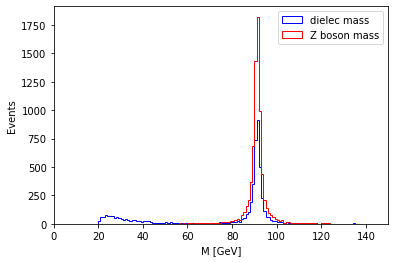

In [ ]:
plt.hist(dielec_mass,bins=150,range=(0,150),color='blue',histtype='step',label='dielec mass')
plt.hist(z_mass,bins=150,range=(0,150),color='red',histtype='step',label='Z boson mass')
plt.xlim(0,150)
plt.xlabel("M [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()

In [ ]:
print(len(dilepton_mass))

NameError: ignored

In [ ]:
muon = (pid == 13) & (status == 1)
amuon = (pid == -13) & (status == 1)

In [ ]:
pt_muon = pt[muon]
eta_muon = eta[muon]
phi_muon = phi[muon]

In [ ]:
pt_amuon = pt[amuon]
eta_amuon = eta[amuon]
phi_amuon = phi[amuon]

In [ ]:
dimuon_mass = []
for i in range(len(pt)):
  if pt_muon.counts[i] == 1:
    if pt_amuon.counts[i] == 1:
      dimuon_mass.append(np.sqrt(2*pt_amuon[i]*pt_muon[i]*(np.cosh(eta_amuon[i] - eta_muon[i]) - np.cos(phi_amuon[i] - phi_muon[i]))))

In [ ]:
dimuon_mass = np.array(dimuon_mass).flatten()

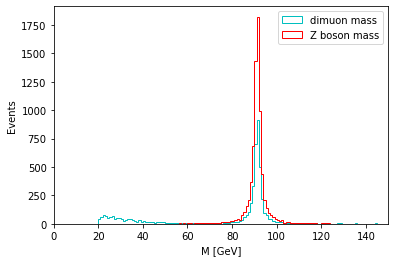

In [ ]:
plt.hist(dimuon_mass,bins=150,range=(0,150),color='c',histtype='step',label='dimuon mass')
plt.hist(z_mass,bins=150,range=(0,150),color='red',histtype='step',label='Z boson mass')
plt.xlim(0,150)
plt.xlabel("M [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()

In [ ]:
'''
dd = np.array(dielec_mass).flatten()
ee = np.array(dimuon_mass).flatten()
print(dd)
print(ee)
'''

In [ ]:
'''
ff = np.concatenate((dd,ee),axis=0)
print(len(ff))
plt.hist(ff)
plt.hist(z_mass)
plt.show()
'''

In [ ]:
dilepton_mass = np.concatenate((dielec_mass,dimuon_mass),axis=0)

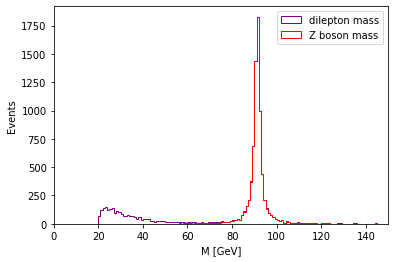

In [ ]:
plt.hist(dilepton_mass,bins=150,range=(0,150),color='purple',histtype='step',label='dilepton mass')
plt.hist(z_mass,bins=150,range=(0,150),color='red',histtype='step',label='Z boson mass')
plt.xlim(0,150)
plt.xlabel("M [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()